# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

plt.style.use('classic')

# Funktionen

$$ \chi^2/dof = \frac{1}{n-p} \sum_i^n \frac{f(x_i)-y_i)^2}{u_{y_i}^2} $$

In [2]:
def lin_reg(x,a,b):
  y = a*x+b
  return y

def chi_sq(y,fx,u_y,p=2):
  """
  Variables
    n [int]:                length of the
    y [numpy array]:        y values for the y axis
    fx [numpy array]:       y values from the regression
    u_y[int, numpy array]:  Unsicherheit/uncertainty from y
    p [int]:                number of parameters of the regression
  Return:
    chi square
  """
  n = len(y)
  factor = 1/(n-p)
  return factor * np.sum((y-fx)**2/u_y**2)

def reg_wls(x,y,uy,a_round=3,b_round=3,r_round=4):
  '''
  Variables:
    x [numpy array, pandas serie]: x-data
    y [numpy array, pandas serie]:
    uy [int, numpy array, pandas serie]: uncertainties/standard derivation of y
    a_round [int]: number of digits after the point (us) or comma (german)
    b_round [int]: number of digits after the point (us) or comma (german)
    r_round [int]: number of digits after the point (us) or comma (german)

  Returning variables:
    a:    from a*x+b
    ua:   uncertainty of a
    b:    from a*x+b
    ub:   uncertainty of b
    R:    R square
    chi:  chi square
  '''
  # calculating regression
  X = sm.add_constant(x)
  model = sm.WLS(y,X,weights=uy)
  results = model.fit()
  print(results.summary())

  # Parameters
  a = round(results.params[1],a_round)
  b = round(results.params[0],b_round)
  ua = round(results.bse[1],a_round)
  ub = round(results.bse[0],b_round)
  R = round(results.rsquared,r_round)
  residuals = np.array(results.resid)

  # lin. Reg.
  f_x = a*x+b

  # chi square
  chi = round(chi_sq(x,y,f_x,uy),3)

  return a,ua,b,ub,R,chi,residuals

def reg_ols(x,y,a_round=3,b_round=3,r_round=4):
  '''
  Variables:
    x [numpy array, pandas serie]: x-data
    y [numpy array, pandas serie]:
    a_round [int]: number of digits after the point (us) or comma (german)
    b_round [int]: number of digits after the point (us) or comma (german)
    r_round [int]: number of digits after the point (us) or comma (german)

  Returning variables:
    a:    from a*x+b
    ua:   uncertainty of a
    b:    from a*x+b
    ub:   uncertainty of b
    R:    R square
  '''
  # calculating regression
  X = sm.add_constant(x)
  model = sm.OLS(y,X)
  results = model.fit()
  print(results.summary())

  # Parameters
  a = round(results.params[1],a_round)
  b = round(results.params[0],b_round)
  ua = round(results.bse[1],a_round)
  ub = round(results.bse[0],b_round)
  R = round(results.rsquared,r_round)
  residuals = np.array(results.resid)

  return a,ua,b,ub,R,residuals

# Data

In [28]:
# a1
mw_a1 = 0.246 # kg
mw_a3 = 0.242 # kg
cw = 4.1813 # kJ/(kg K), Versuchsskript
mw_cw_a1 = cw*mw_a1

In [3]:
url = 'https://github.com/Ben-physics-dotcom/Internships/raw/main/GPR1/Data/T1-W%C3%A4rmekapazit%C3%A4t-eines-Kalorimeters.xlsx'

In [4]:
xl = pd.ExcelFile(url)
xl.sheet_names

['Aufgabe-1', 'Aufgabe-3', 'Unsicherheiten']

In [5]:
df1 = pd.read_excel(xl,'Aufgabe-1')
df3 = pd.read_excel(xl,'Aufgabe-3')
dfu = pd.read_excel(xl,'Unsicherheiten')

In [24]:
dfu

,Unnamed: 0,Variable,Wert,Einheit
0,0,M1,148.0,ml*kW
1,1,M1,155.0,ml*kW
2,2,M2,148.0,ml*kW
3,3,M2,148.0,ml*kW
4,4,M3,150.0,ml*kW
5,5,M3,142.0,ml*kW
6,6,u_DT,0.2,°C


# A1

In [6]:
df1.head()

,Unnamed: 0,I,U1,t [s],T [°C],I1,U2,t1 [s],T1 [°C]
0,0,NaN,NaN,0,26.9,NaN,NaN,0,26.9
1,1,NaN,NaN,60,26.4,NaN,NaN,60,27.0
2,2,NaN,NaN,120,26.3,NaN,NaN,120,27.1
3,3,NaN,NaN,180,26.4,NaN,NaN,180,27.1
4,4,NaN,NaN,240,26.4,NaN,NaN,240,27.1


In [7]:
df1.tail()

,Unnamed: 0,I,U1,t [s],T [°C],I1,U2,t1 [s],T1 [°C]
37,37,NaN,NaN,720,44.6,NaN,NaN,720,45.2
38,38,NaN,NaN,780,44.4,NaN,NaN,780,45.0
39,39,NaN,NaN,840,44.2,NaN,NaN,840,44.8
40,40,NaN,NaN,900,44.1,NaN,NaN,900,44.7
41,41,NaN,NaN,960,43.9,NaN,NaN,960,44.5


In [8]:
sdf1 = df1.dropna()
sdf1.head()

,Unnamed: 0,I,U1,t [s],T [°C],I1,U2,t1 [s],T1 [°C]
6,6,3.0,24.75,310,27.2,3.0,25.0,310,27.8
7,7,3.0,24.75,320,27.9,3.0,25.0,320,28.3
8,8,3.0,24.75,330,28.6,3.0,25.0,330,29.1
9,9,3.0,24.75,340,29.2,3.0,25.0,340,29.7
10,10,3.0,24.75,350,29.8,3.0,25.0,350,30.4


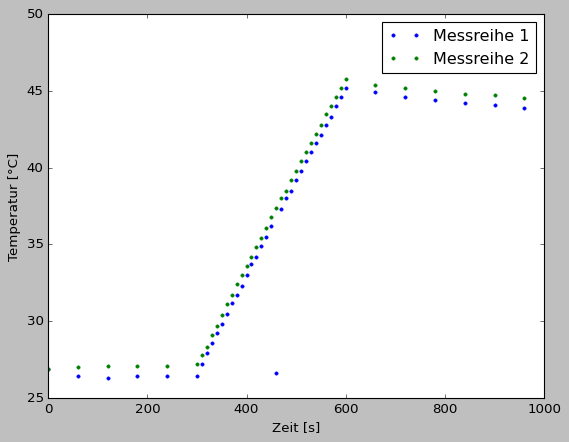

In [9]:
plt.plot(df1['t [s]'],df1['T [°C]'],'.',label='Messreihe 1')
plt.plot(df1['t1 [s]'],df1['T1 [°C]'],'.',label='Messreihe 2')
plt.xlabel('Zeit [s]')
plt.ylabel('Temperatur [°C]')
plt.legend()

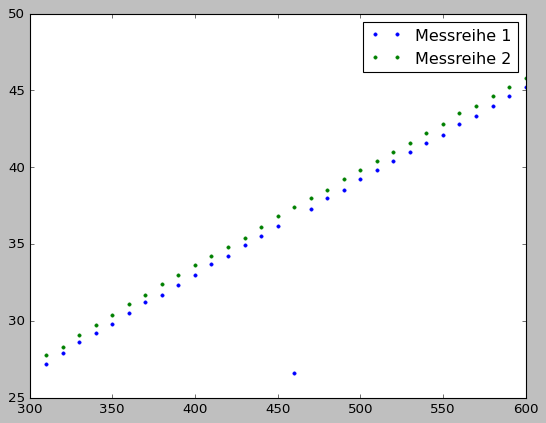

In [10]:
plt.plot(sdf1['t [s]'],sdf1['T [°C]'],'.',label='Messreihe 1')
plt.plot(sdf1['t1 [s]'],sdf1['T1 [°C]'],'.',label='Messreihe 2')
plt.legend()

## $C_K$ bestimmen
Idee: Formel
$$ T(t) = \frac{UI}{m_wc_w +C_k}\cdot t$$

In [11]:
a1,ua1,b1,ub1,R1,residuals1 = reg_ols(sdf1['t [s]'],sdf1['T [°C]'])

                            OLS Regression Results                            
Dep. Variable:                 T [°C]   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     242.8
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           2.50e-15
Time:                        17:16:38   Log-Likelihood:                -60.310
No. Observations:                  30   AIC:                             124.6
Df Residuals:                      28   BIC:                             127.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0429      1.827      4.403      0.0

<ipython-input-2-3b08a86a7835>:83: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a = round(results.params[1],a_round)
<ipython-input-2-3b08a86a7835>:84: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b = round(results.params[0],b_round)
<ipython-input-2-3b08a86a7835>:85: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ua = round(results.bse[1],a_round)
<ipython-input-2-3b08a86a7835>:86: FutureWarning: Series.__getitem__ treating keys a

In [12]:
print(a1)
print(b1)
print(R1)

0.061
8.043
0.8966


In [13]:
sdf1.head()

,Unnamed: 0,I,U1,t [s],T [°C],I1,U2,t1 [s],T1 [°C]
6,6,3.0,24.75,310,27.2,3.0,25.0,310,27.8
7,7,3.0,24.75,320,27.9,3.0,25.0,320,28.3
8,8,3.0,24.75,330,28.6,3.0,25.0,330,29.1
9,9,3.0,24.75,340,29.2,3.0,25.0,340,29.7
10,10,3.0,24.75,350,29.8,3.0,25.0,350,30.4


In [14]:
UI1 = sdf1['I']*sdf1['U1']
UI1_mean = UI1.mean()
UI1_mean

74.25

In [15]:
UI2 = sdf1['I1']*sdf1['U2']
UI2_mean = UI2.mean()
UI2_mean

75.0

In [16]:
a2,ua2,b2,ub2,R2,residuals2 = reg_ols(sdf1['t1 [s]'],sdf1['T1 [°C]'],a_round=4)

                            OLS Regression Results                            
Dep. Variable:                T1 [°C]   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.530e+04
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           2.51e-50
Time:                        17:16:38   Log-Likelihood:                 27.315
No. Observations:                  30   AIC:                            -50.63
Df Residuals:                      28   BIC:                            -47.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.7012      0.098     88.387      0.0

<ipython-input-2-3b08a86a7835>:83: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a = round(results.params[1],a_round)
<ipython-input-2-3b08a86a7835>:84: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b = round(results.params[0],b_round)
<ipython-input-2-3b08a86a7835>:85: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ua = round(results.bse[1],a_round)
<ipython-input-2-3b08a86a7835>:86: FutureWarning: Series.__getitem__ treating keys a

In [17]:
print(a2)
print(ua2)
print(b2)
print(R2)

0.0621
0.0002
8.701
0.9997


In [33]:
# C_k
CK1 = round(UI1_mean/a1-mw_cw_a1*1e3,-1) # weil: kJ/K = 1000 J/K = 1e3 J/K
print(CK1)
CK2 = round(UI2_mean/a2-mw_cw_a1*1e3,0)
CK2

190.0


179.0

In [19]:
# Unsicherheit von C_k
u_ck1 = round(np.abs(UI1_mean/a1**2*ua1),-1)
print(u_ck1)
u_ck2 = round(np.abs(UI2_mean/a2**2*ua2),0)
u_ck2

80.0


4.0

# A3

In [26]:
df3 = df3.drop(['Unnamed: 0'],axis=1)
df3

,T1 [°C],T2 [°C],Tm [°C]
0,26.0,28.1,31.7
1,26.8,42.5,33.6
2,27.2,39.6,32.5


In [35]:
# in kg
m1 = np.array([0.148,0.148,0.150])
m2 = np.array([0.155,0.148,0.142])

$$ C_k = \frac{m_2 c_w ⋅ (T_2-T_m)}{T_m-T_1}-m_1 c_w $$

In [38]:
Ck = m2*cw*1e3*(np.array(df3['T2 [°C]'])-np.array(df3['Tm [°C]']))/(np.array(df3['Tm [°C]'])-np.array(df3['T1 [°C]']))-m1*cw*1e3
Ck_mean = Ck.mean()
u_ck = Ck.std()

In [39]:
print(Ck_mean)
u_ck

-222.9503159471932


569.445813344196

In [40]:
Ck

array([-1028.15966316,   191.11000588,   168.19870943])

In [43]:
Ck_v2 = np.array([191.11000588,   168.19870943])
Ck_v2_mean = round(Ck_v2.mean(),0)
u_ck_v2 = round(Ck_v2.std(),0)

In [44]:
# Ergebnis der Mischungsmethode
print(Ck_v2_mean)
u_ck_v2

180.0


11.0

# Residuen

## A1

In [20]:
residuals1

array([ 0.10258065,  0.18791991,  0.27325918,  0.25859844,  0.24393771,
        0.32927697,  0.41461624,  0.29995551,  0.28529477,  0.37063404,
        0.4559733 ,  0.34131257,  0.42665184,  0.4119911 ,  0.49733037,
       -9.71733037,  0.3680089 ,  0.45334816,  0.33868743,  0.4240267 ,
        0.40936596,  0.39470523,  0.38004449,  0.36538376,  0.25072303,
        0.33606229,  0.22140156,  0.30674082,  0.29208009,  0.27741935])

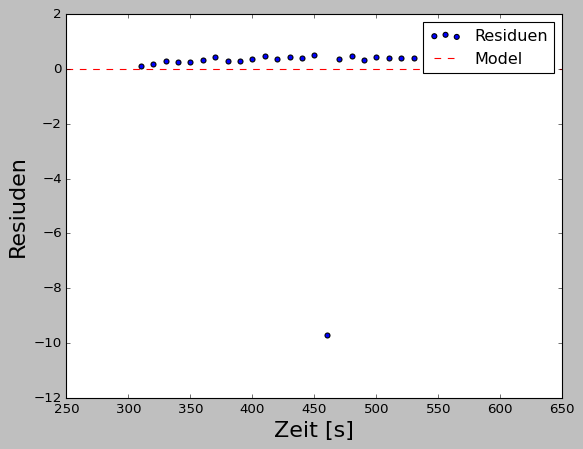

In [21]:
plt.scatter(sdf1['t [s]'],residuals1,label='Residuen')
plt.axhline(y=0,color='red',linestyle='--',label='Model')
plt.ylabel('Resiuden',fontsize=20)
plt.xlabel('Zeit [s]',fontsize=20)
plt.legend()


In [22]:
residuals2

array([-0.14537634, -0.26615499, -0.08693363, -0.10771227, -0.02849092,
        0.05073044,  0.0299518 ,  0.10917316,  0.08839451,  0.06761587,
        0.04683723,  0.02605858,  0.00527994,  0.0845013 ,  0.16372265,
        0.14294401,  0.12216537,  0.00138673,  0.08060808,  0.05982944,
        0.0390508 ,  0.01827215, -0.00250649, -0.02328513, -0.04406377,
        0.03515758, -0.08562106, -0.1063997 , -0.12717835, -0.14795699])

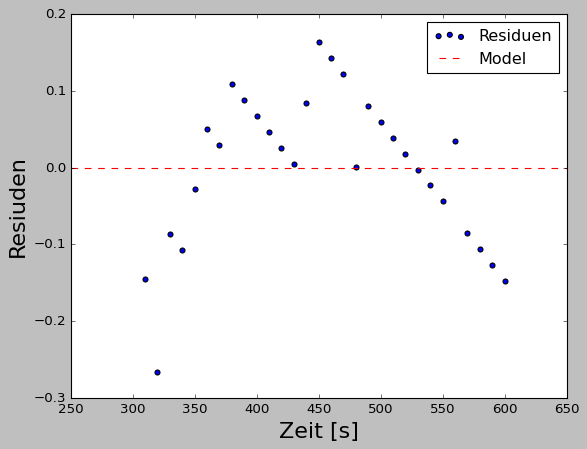

In [23]:
plt.scatter(sdf1['t1 [s]'],residuals2,label='Residuen')
plt.axhline(y=0,color='red',linestyle='--',label='Model')
plt.ylabel('Resiuden',fontsize=20)
plt.xlabel('Zeit [s]',fontsize=20)
plt.legend()
